# Compute Metrics about the Bipartite Graph

In [3]:
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import scripts.get_graph as gg
import pandas as pd

### Betweenness Centrality

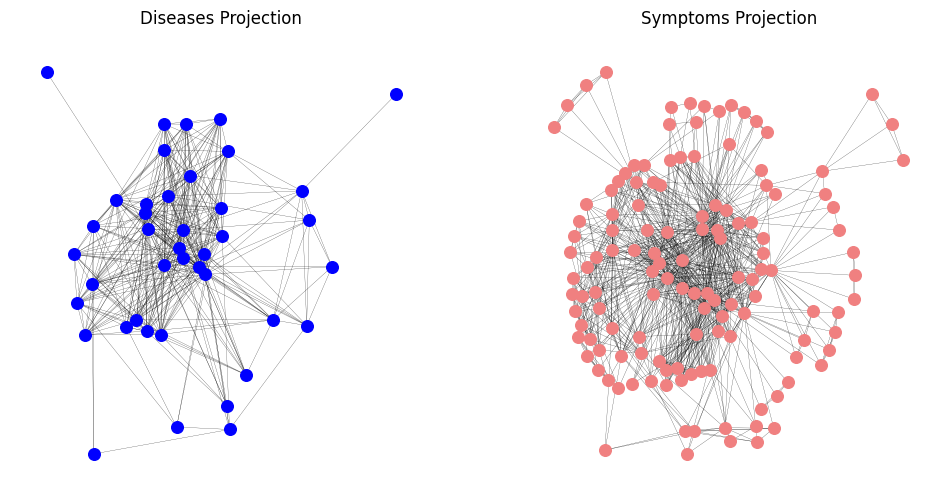

In [5]:
# Create a bipartite graph from the adjacency matrix
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values
B = gg.get_graph(adjacency_matrix)

# Get the nodes of each partition (diseases and symptoms)
diseases = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
symptoms = set(B) - diseases

# Create unipartite projections
G_diseases = nx.bipartite.projected_graph(B, diseases)
G_symptoms = nx.bipartite.projected_graph(B, symptoms)

# Compute the layout positions of the two unipartite projections
pos = nx.kamada_kawai_layout(B)

# Draw the unipartite projections (optional)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Diseases Projection')
nx.draw( G_diseases,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="blue")



plt.subplot(1, 2, 2)
plt.title('Symptoms Projection')
nx.draw( G_symptoms,
    pos,
    with_labels=False,
    font_weight="bold",
    node_size=70,  # Adjust the node size
    width=0.15,  # Adjust the edge width
    node_color="lightcoral")

plt.show()